<a href="https://colab.research.google.com/github/sulav063/Machine_Learning_Workshop/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbor(KNN) Algorithm for Machine Learning

## Problem for K-NN Algorithm

There is a Car manufacturer company that has manufactured a new SUV car. The company wants to give the ads to the users who are interested in buying that SUV. So for this problem, we have a dataset that contains multiple user's information through the social network. The dataset contains lots of information but the Estimated Salary and Age we will consider for the independent variable and the Purchased variable is for the dependent variable. Below is the dataset:

In [11]:
import pandas as pd
import numpy as np
import random

In [12]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pandas/knn_dataset.csv")
df

,User ID,Gender,Age,Estimated Salary,Purchased
0,1,Male,46,70015,0
1,2,Male,32,142096,1
2,3,Male,25,127059,0
3,4,Male,38,130687,0
4,5,Female,36,107939,1
...,...,...,...,...,...
95,96,Female,26,132547,1
96,97,Female,32,144249,0
97,98,Female,32,54754,0
98,99,Male,43,162483,1


In [13]:
import pandas as pd
import numpy as np
import random

# Set random seed for reproducibility
np.random.seed(42)

# Generate data
num_rows = 100
data = {
    'User ID': range(1, num_rows + 1),
    'Gender': [random.choice(['Male', 'Female']) for _ in range(num_rows)],
    'Age': np.random.randint(18, 51, num_rows),
    'Estimated Salary': np.random.randint(20000, 200001, num_rows),
    'Purchased': np.random.randint(0, 2, num_rows)
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('knn_dataset.csv', index=False)

print(df.head())
print(f"\nDataset shape: {df.shape}")

   User ID  Gender  Age  Estimated Salary  Purchased
0        1  Female   46             70015          0
1        2  Female   32            142096          1
2        3  Female   25            127059          0
3        4  Female   38            130687          0
4        5    Male   36            107939          1

Dataset shape: (100, 5)


In [14]:
display(df)

,User ID,Gender,Age,Estimated Salary,Purchased
0,1,Female,46,70015,0
1,2,Female,32,142096,1
2,3,Female,25,127059,0
3,4,Female,38,130687,0
4,5,Male,36,107939,1
...,...,...,...,...,...
95,96,Female,26,132547,1
96,97,Male,32,144249,0
97,98,Female,32,54754,0
98,99,Male,43,162483,1


In [15]:
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

#importing datasets
data_set= pd.read_csv('knn_dataset.csv')

#Extracting Independent and dependent Variable
x= data_set.iloc[:, [2,3]].values
y= data_set.iloc[:, 4].values

print(x)
print("*****************")
print(y)


# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

[[    46  70015]
 [    32 142096]
 [    25 127059]
 [    38 130687]
 [    36 107939]
 [    40 169213]
 [    28 125878]
 [    28 184899]
 [    41  82623]
 [    41  95450]
 [    20 113426]
 [    39 137845]
 [    19 173371]
 [    41  63585]
 [    47 129225]
 [    19  84044]
 [    38 193629]
 [    50 129556]
 [    29  22693]
 [    39 115259]
 [    42  45939]
 [    44 199997]
 [    45 194013]
 [    33 172906]
 [    32  38047]
 [    20  46105]
 [    24  95766]
 [    38 166779]
 [    26 173048]
 [    35  64262]
 [    21 145117]
 [    42  43776]
 [    31 181152]
 [    26 148376]
 [    43 157848]
 [    19 112787]
 [    37 147948]
 [    45  75016]
 [    24 160546]
 [    25  41959]
 [    31 156602]
 [    34 139101]
 [    21  23748]
 [    19  33545]
 [    23 147659]
 [    21 185838]
 [    46  93530]
 [    35 113557]
 [    43  81087]
 [    27  88840]
 [    31 138451]
 [    48  71005]
 [    32 197648]
 [    25  59353]
 [    31  72733]
 [    40  85318]
 [    38 174736]
 [    33  87172]
 [    35 11326

In [16]:
x_test

array([[-0.9836257 , -0.40785029],
       [ 1.19253735, -0.04789177],
       [-0.87481754,  0.23150616],
       [ 0.75730474, -0.62131644],
       [ 1.84538626,  0.98135505],
       [-0.22196863,  0.77955517],
       [ 0.53968844,  1.59161735],
       [ 0.10445583,  0.28650721],
       [-0.22196863, -0.87844426],
       [-0.76600939,  0.3436331 ],
       [-0.87481754, -1.15181497],
       [ 1.0837292 , -0.9381445 ],
       [-0.9836257 ,  0.21616226],
       [ 0.86611289, -1.06534973],
       [-0.54839309,  1.41325216],
       [-1.31005015,  0.60045446],
       [ 1.3013455 ,  1.59946296],
       [-0.11316048, -1.5871241 ],
       [-0.76600939,  0.66704004],
       [ 0.86611289, -0.67637878],
       [-1.52766646, -1.67910578],
       [ 1.41015365,  0.73957113],
       [ 0.53968844,  0.3056309 ],
       [ 0.86611289, -0.51611571],
       [-1.31005015,  1.43243714]])

In [17]:
y_test

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0])

Fitting K-NN classifier to the Training data: Now we will fit the K-NN classifier to the training data. To do this we will import the KNeighborsClassifier class of Sklearn Neighbors library. After importing the class, we will create the Classifier object of the class. The Parameter of this class will be

n_neighbors: To define the required neighbors of the algorithm. Usually, it takes 5.
metric='minkowski': This is the default parameter and it decides the distance between the points.
p=2: It is equivalent to the standard Euclidean metric.
And then we will fit the classifier to the training data. Below is the code for it:

In [18]:
#Fitting K-NN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.
Predicting the Test Result: To predict the test set result, we will create a y_pred vector as we did in Logistic Regression. Below is the code for it:

In [19]:
#Predicting the test set result
y_pred= classifier.predict(x_test)

In [20]:
y_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0])

<ipython-input-21-d2c6025297b5>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


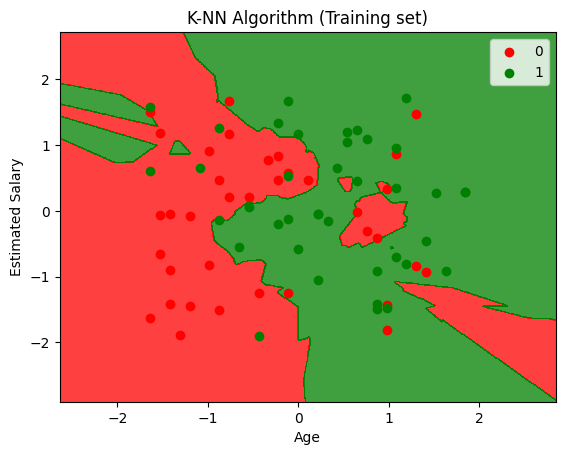

In [21]:
#Visulaizing the trianing set result
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red','green' )))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
      c = ListedColormap(('red', 'green'))(i), label = j)
mtp.title('K-NN Algorithm (Training set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()

<ipython-input-22-74d3af1e2a82>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


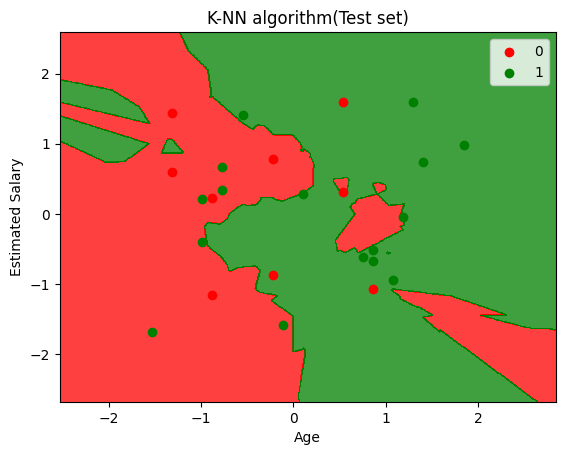

In [22]:
#Visualizing the test set result
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red','green' )))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
      c = ListedColormap(('red', 'green'))(i), label = j)
mtp.title('K-NN algorithm(Test set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()